# Assignment 4: Exploratory Data Analysis 2: Categorical Variables

### Read in Datasets: Training, Address, Latlons

In [5]:
# reading in data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# reading in training data
blight_train = pd.read_csv('readonly/train.csv')
addresses = pd.read_csv('readonly/addresses.csv')
latlons = pd.read_csv('readonly/latlons.csv')

# checking training data
blight_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


#### Combining Datasets

In [6]:
# merge 1: setting indices to ticket id
blight_train = blight_train.set_index('ticket_id')
addresses = addresses.set_index('ticket_id')

# merge 1: merging on ticket id
blight_train = pd.merge(blight_train, addresses, how = 'inner',
                    left_index=True, right_index=True)

# resetting index, to retain ticket id in data
blight_train = blight_train.reset_index()

# merge 2: setting address to upper case
blight_train['address'] = blight_train['address'].str.upper()
latlons['address'] = latlons['address'].str.upper()

# merge 2: setting indices to address
blight_train = blight_train.set_index('address')
latlons = latlons.set_index('address')

# merge 2: merging on address
blight_train = pd.merge(blight_train, latlons, how = 'inner',
                    left_index=True, right_index=True)

# resetting index
blight_train = blight_train.reset_index()
blight_train.head()

,address,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,...,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,lat,lon
0,"0 10TH ST, DETROIT MI",24928,Department of Public Works,"Hayes, Billy J","XXX, XXX XXX",0.0,10TH ST,NaN,NaN,XXXX,...,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,42.325689,-83.06433
1,"0 10TH ST, DETROIT MI",71887,Health Department,"Zizi, Josue","0000000000000000000000, 000000000000000000000",0.0,10TH ST,NaN,NaN,0,...,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,42.325689,-83.06433
2,"0 10TH ST, DETROIT MI",157969,Department of Public Works,"Baker, Kenneth","VOID, VOID",0.0,10TH ST,NaN,NaN,VOID,...,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,42.325689,-83.06433
3,"0 10TH ST, DETROIT MI",168151,Department of Public Works,"Zizi, Josue","0000000000000, 00000000000000",0.0,10TH ST,NaN,NaN,0,...,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,42.325689,-83.06433
4,"0 10TH ST, DETROIT MI",195261,Department of Public Works,"Zizi, Josue","VOID, VOID",0.0,10TH ST,NaN,NaN,VOID,...,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN,42.325689,-83.06433


In [7]:
# Drop all continuous features
cont_feat = ['admin_fee', 'balance_due', 'clean_up_cost', 'discount_amount', 'fine_amount', 'judgment_amount', 'lat', 'late_fee', 'lon', 'mailing_address_str_number', 'payment_amount', 'state_fee', 'ticket_id', 'violation_street_number', 'violation_zip_code']
blight_train.drop(cont_feat, axis=1, inplace=True)
blight_train.head()

,address,agency_name,inspector_name,violator_name,violation_street_name,mailing_address_str_name,city,state,zip_code,non_us_str_code,...,hearing_date,violation_code,violation_description,disposition,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,"0 10TH ST, DETROIT MI",Department of Public Works,"Hayes, Billy J","XXX, XXX XXX",10TH ST,XXXX,DETROIT,MI,0,NaN,...,2005-04-19 15:00:00,22-2-17,Improper storage and separation of solid waste...,Not responsible by Dismissal,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
1,"0 10TH ST, DETROIT MI",Health Department,"Zizi, Josue","0000000000000000000000, 000000000000000000000",10TH ST,0,0,MI,0,NaN,...,2006-06-02 09:00:00,22-2-88,"Failure of owner to keep property, its sidewal...",Not responsible by Dismissal,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
2,"0 10TH ST, DETROIT MI",Department of Public Works,"Baker, Kenneth","VOID, VOID",10TH ST,VOID,O,MI,0,NaN,...,2008-03-20 10:30:00,9-1-103(C),Removal of snow and ice from sidewalks,Not responsible by City Dismissal,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,"0 10TH ST, DETROIT MI",Department of Public Works,"Zizi, Josue","0000000000000, 00000000000000",10TH ST,0,0,MI,0,NaN,...,2008-07-08 09:00:00,22-2-16,Improperly stored or separated Solid Waste,Not responsible by Dismissal,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,"0 10TH ST, DETROIT MI",Department of Public Works,"Zizi, Josue","VOID, VOID",10TH ST,VOID,VOID,MI,0,NaN,...,2009-02-24 09:00:00,22-2-88,"Failure of owner to keep property, its sidewal...",Not responsible by Dismissal,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


### Exploring Categorical Features

Exploring `agency_name`, `compliance_detail`, `disposition`, `payment_status`, `city`, `state`, `zip_code`, `country`

In [8]:
blight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   address                   250306 non-null  object 
 1   agency_name               250306 non-null  object 
 2   inspector_name            250306 non-null  object 
 3   violator_name             250272 non-null  object 
 4   violation_street_name     250306 non-null  object 
 5   mailing_address_str_name  250302 non-null  object 
 6   city                      250306 non-null  object 
 7   state                     250213 non-null  object 
 8   zip_code                  250305 non-null  object 
 9   non_us_str_code           3 non-null       object 
 10  country                   250306 non-null  object 
 11  ticket_issued_date        250306 non-null  object 
 12  hearing_date              237815 non-null  object 
 13  violation_code            250306 non-null  o

In [17]:
# checking null values for state
blight_train.groupby(blight_train['state'].isnull()).mean()

,compliance
state,
False,0.072524
True,0.095238


In [19]:
# replacing null values for state with 'MI', after verifying using address 
blight_train['state'] = np.where(blight_train['state'].isnull(), 'MI', blight_train['state'])

In [20]:
# checking null values for state
blight_train.groupby(blight_train['state'].isnull()).mean()

,compliance
state,
False,0.072536


<Figure size 432x288 with 0 Axes>

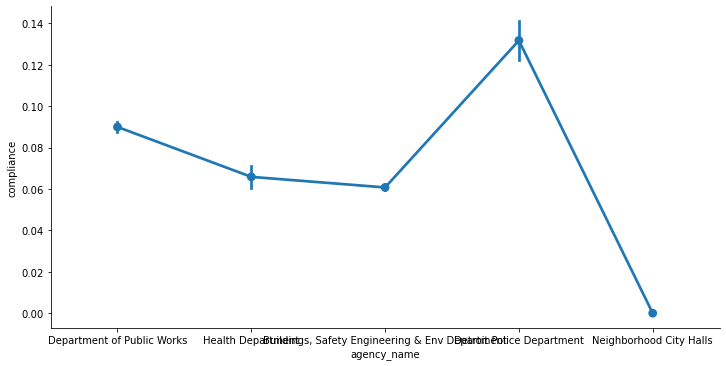

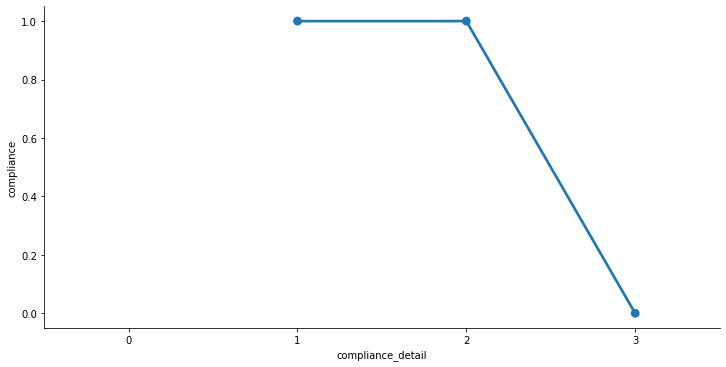

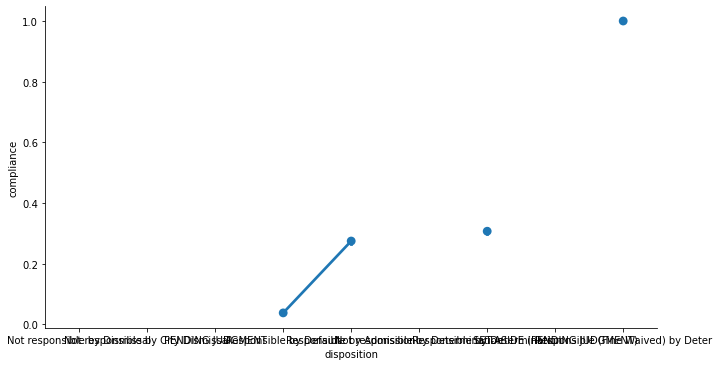

In [30]:
for i, col in enumerate(['agency_name', 'compliance_detail', 'disposition']):
    plt.figure(i)
    sns.catplot(x=col, y='compliance', data=blight_train, kind='point', aspect=2, )

In [31]:
# pivot table of compliance by agency and compliance status
blight_train.pivot_table('compliance', index='agency_name', columns='compliance_detail', aggfunc='count')

# we find that non compliant late over 1 month, non compliant no payment, and compliant late payment within 1 month
# are the top 3 compliance statuses for these agencies

compliance_detail,0,1,2,3
agency_name,,,,
"Buildings, Safety Engineering & Env Department",0.0,2717.0,3106.0,90040.0
Department of Public Works,0.0,2039.0,2679.0,47727.0
Detroit Police Department,0.0,310.0,278.0,3876.0
Health Department,0.0,162.0,306.0,6639.0
Neighborhood City Halls,0.0,NaN,NaN,1.0


In [33]:
# pivot table of compliance by state and payment status
blight_train.pivot_table('compliance', index='state', columns='payment_status', aggfunc='count')

# of course we are most interested in michigan here, followed in numbers by CA and TX.
# dispositions show that most ticketed individuals are deemed responsible, one way or another

payment_status,1,2,3
state,,,
AK,9.0,1.0,1.0
AL,101.0,20.0,17.0
AR,47.0,4.0,5.0
AZ,191.0,21.0,33.0
BC,11.0,3.0,2.0
BL,1.0,NaN,NaN
CA,2701.0,155.0,972.0
CO,47.0,5.0,45.0
CT,42.0,1.0,6.0


### Converting `compliance_detail` and `payment_status` to numeric

In [29]:
# recoding compliance detail, overwriting original variable itself
compliance_lev = {'not responsible by disposition': 0,
                  'not responsible by pending judgment disposition': 0,
                  'compliant by early payment': 1,
                  'compliant by no fine': 1,
                  'compliant by on-time payment': 1,
                  'compliant by payment with no scheduled hearing': 1,
                  'compliant by late payment within 1 month': 2,
                  'compliant by payment on unknown date': 2,
                  'non-compliant by late payment more than 1 month': 3,
                  'non-compliant by no payment': 3
                 }

blight_train['compliance_detail'] = blight_train['compliance_detail'].map(compliance_lev)
blight_train.head()

,address,agency_name,inspector_name,violator_name,violation_street_name,mailing_address_str_name,city,state,zip_code,non_us_str_code,...,hearing_date,violation_code,violation_description,disposition,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,"0 10TH ST, DETROIT MI",Department of Public Works,"Hayes, Billy J","XXX, XXX XXX",10TH ST,XXXX,DETROIT,MI,0,NaN,...,2005-04-19 15:00:00,22-2-17,Improper storage and separation of solid waste...,Not responsible by Dismissal,NaN,NO PAYMENT APPLIED,NaN,NaN,0,NaN
1,"0 10TH ST, DETROIT MI",Health Department,"Zizi, Josue","0000000000000000000000, 000000000000000000000",10TH ST,0,0,MI,0,NaN,...,2006-06-02 09:00:00,22-2-88,"Failure of owner to keep property, its sidewal...",Not responsible by Dismissal,NaN,NO PAYMENT APPLIED,NaN,NaN,0,NaN
2,"0 10TH ST, DETROIT MI",Department of Public Works,"Baker, Kenneth","VOID, VOID",10TH ST,VOID,O,MI,0,NaN,...,2008-03-20 10:30:00,9-1-103(C),Removal of snow and ice from sidewalks,Not responsible by City Dismissal,NaN,NO PAYMENT APPLIED,NaN,NaN,0,NaN
3,"0 10TH ST, DETROIT MI",Department of Public Works,"Zizi, Josue","0000000000000, 00000000000000",10TH ST,0,0,MI,0,NaN,...,2008-07-08 09:00:00,22-2-16,Improperly stored or separated Solid Waste,Not responsible by Dismissal,NaN,NO PAYMENT APPLIED,NaN,NaN,0,NaN
4,"0 10TH ST, DETROIT MI",Department of Public Works,"Zizi, Josue","VOID, VOID",10TH ST,VOID,VOID,MI,0,NaN,...,2009-02-24 09:00:00,22-2-88,"Failure of owner to keep property, its sidewal...",Not responsible by Dismissal,NaN,NO PAYMENT APPLIED,NaN,NaN,0,NaN


In [32]:
# recoding payment status, overwriting original variable itself
payment_num = {'NO PAYMENT APPLIED': 1,
               'PARTIAL PAYMENT APPLIED': 2,
               'PAID IN FULL': 3
              }

blight_train['payment_status'] = blight_train['payment_status'].map(payment_num)
blight_train.head()

,address,agency_name,inspector_name,violator_name,violation_street_name,mailing_address_str_name,city,state,zip_code,non_us_str_code,...,hearing_date,violation_code,violation_description,disposition,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,"0 10TH ST, DETROIT MI",Department of Public Works,"Hayes, Billy J","XXX, XXX XXX",10TH ST,XXXX,DETROIT,MI,0,NaN,...,2005-04-19 15:00:00,22-2-17,Improper storage and separation of solid waste...,Not responsible by Dismissal,NaN,1,NaN,NaN,0,NaN
1,"0 10TH ST, DETROIT MI",Health Department,"Zizi, Josue","0000000000000000000000, 000000000000000000000",10TH ST,0,0,MI,0,NaN,...,2006-06-02 09:00:00,22-2-88,"Failure of owner to keep property, its sidewal...",Not responsible by Dismissal,NaN,1,NaN,NaN,0,NaN
2,"0 10TH ST, DETROIT MI",Department of Public Works,"Baker, Kenneth","VOID, VOID",10TH ST,VOID,O,MI,0,NaN,...,2008-03-20 10:30:00,9-1-103(C),Removal of snow and ice from sidewalks,Not responsible by City Dismissal,NaN,1,NaN,NaN,0,NaN
3,"0 10TH ST, DETROIT MI",Department of Public Works,"Zizi, Josue","0000000000000, 00000000000000",10TH ST,0,0,MI,0,NaN,...,2008-07-08 09:00:00,22-2-16,Improperly stored or separated Solid Waste,Not responsible by Dismissal,NaN,1,NaN,NaN,0,NaN
4,"0 10TH ST, DETROIT MI",Department of Public Works,"Zizi, Josue","VOID, VOID",10TH ST,VOID,VOID,MI,0,NaN,...,2009-02-24 09:00:00,22-2-88,"Failure of owner to keep property, its sidewal...",Not responsible by Dismissal,NaN,1,NaN,NaN,0,NaN


### One-Hot Encoding `Agency Name`, `Inspector Name` and `State`

In [34]:
# Agency Name

# Get one hot encoding of column Agency Name
one_hot = pd.get_dummies(blight_train['agency_name'])
# Drop column Agency Name as it is now encoded
blight_train = blight_train.drop('agency_name',axis = 1)
# Join the encoded df
blight_train = blight_train.join(one_hot)
blight_train.head()

,address,inspector_name,violator_name,violation_street_name,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,...,payment_status,collection_status,grafitti_status,compliance_detail,compliance,"Buildings, Safety Engineering & Env Department",Department of Public Works,Detroit Police Department,Health Department,Neighborhood City Halls
0,"0 10TH ST, DETROIT MI","Hayes, Billy J","XXX, XXX XXX",10TH ST,XXXX,DETROIT,MI,0,NaN,USA,...,1,NaN,NaN,0,NaN,0,1,0,0,0
1,"0 10TH ST, DETROIT MI","Zizi, Josue","0000000000000000000000, 000000000000000000000",10TH ST,0,0,MI,0,NaN,USA,...,1,NaN,NaN,0,NaN,0,0,0,1,0
2,"0 10TH ST, DETROIT MI","Baker, Kenneth","VOID, VOID",10TH ST,VOID,O,MI,0,NaN,USA,...,1,NaN,NaN,0,NaN,0,1,0,0,0
3,"0 10TH ST, DETROIT MI","Zizi, Josue","0000000000000, 00000000000000",10TH ST,0,0,MI,0,NaN,USA,...,1,NaN,NaN,0,NaN,0,1,0,0,0
4,"0 10TH ST, DETROIT MI","Zizi, Josue","VOID, VOID",10TH ST,VOID,VOID,MI,0,NaN,USA,...,1,NaN,NaN,0,NaN,0,1,0,0,0


In [35]:
# Inspector Name

# Get one hot encoding of column Inspector Name
one_hot = pd.get_dummies(blight_train['inspector_name'])
# Drop column Inspector Name as it is now encoded
blight_train = blight_train.drop('inspector_name',axis = 1)
# Join the encoded df
blight_train = blight_train.join(one_hot)
blight_train.head()

,address,violator_name,violation_street_name,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,...,"Wilcox, Valerie","Wilkins, Rolland W","Williams, Cecila","Williams, Darrin","Williams, Dennis E","Williamson, Lillett","Woodall, Joseph","YOUNG, GERALDINE","Zawislak, Norbet","Zizi, Josue"
0,"0 10TH ST, DETROIT MI","XXX, XXX XXX",10TH ST,XXXX,DETROIT,MI,0,NaN,USA,2005-03-09 12:30:00,...,0,0,0,0,0,0,0,0,0,0
1,"0 10TH ST, DETROIT MI","0000000000000000000000, 000000000000000000000",10TH ST,0,0,MI,0,NaN,USA,2006-04-03 09:35:00,...,0,0,0,0,0,0,0,0,0,1
2,"0 10TH ST, DETROIT MI","VOID, VOID",10TH ST,VOID,O,MI,0,NaN,USA,2008-02-18 00:25:00,...,0,0,0,0,0,0,0,0,0,0
3,"0 10TH ST, DETROIT MI","0000000000000, 00000000000000",10TH ST,0,0,MI,0,NaN,USA,2008-04-11 00:00:00,...,0,0,0,0,0,0,0,0,0,1
4,"0 10TH ST, DETROIT MI","VOID, VOID",10TH ST,VOID,VOID,MI,0,NaN,USA,2008-10-22 07:35:00,...,0,0,0,0,0,0,0,0,0,1


In [36]:
# State

# Get one hot encoding of column State
one_hot = pd.get_dummies(blight_train['state'])
# Drop column state as it is now encoded
blight_train = blight_train.drop('state',axis = 1)
# Join the encoded df
blight_train = blight_train.join(one_hot)
blight_train.head()

,address,violator_name,violation_street_name,mailing_address_str_name,city,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,...,TX,UK,UT,VA,VI,VT,WA,WI,WV,WY
0,"0 10TH ST, DETROIT MI","XXX, XXX XXX",10TH ST,XXXX,DETROIT,0,NaN,USA,2005-03-09 12:30:00,2005-04-19 15:00:00,...,0,0,0,0,0,0,0,0,0,0
1,"0 10TH ST, DETROIT MI","0000000000000000000000, 000000000000000000000",10TH ST,0,0,0,NaN,USA,2006-04-03 09:35:00,2006-06-02 09:00:00,...,0,0,0,0,0,0,0,0,0,0
2,"0 10TH ST, DETROIT MI","VOID, VOID",10TH ST,VOID,O,0,NaN,USA,2008-02-18 00:25:00,2008-03-20 10:30:00,...,0,0,0,0,0,0,0,0,0,0
3,"0 10TH ST, DETROIT MI","0000000000000, 00000000000000",10TH ST,0,0,0,NaN,USA,2008-04-11 00:00:00,2008-07-08 09:00:00,...,0,0,0,0,0,0,0,0,0,0
4,"0 10TH ST, DETROIT MI","VOID, VOID",10TH ST,VOID,VOID,0,NaN,USA,2008-10-22 07:35:00,2009-02-24 09:00:00,...,0,0,0,0,0,0,0,0,0,0
